In [1]:
import json 
import pandas as pd
from urllib.request import urlopen
from disCap import finmod as FM
from disCap import disCap
import matplotlib.pyplot as plt
import numpy as np

'''
financialmodelingprep ask that the API key not be shared.  I keep mine in a json
file.  The API key is available and free for use provided by registration at 
the site, it is to not be shared or left in git. 
'''
api_key = None
api_key = "6163425f2c630fd89ae0c3b7a9fdbe52"

In [2]:
symbols = ['ETHUSD','TMUS']
dfx = FM.portfolio_data(symbols, api_key)
dfx.head(10)

Reading ETHUSD and writing to archive
Symbol: ETHUSD.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading TMUS and writing to archive
Symbol: TMUS.  Keys: dict_keys(['symbol', 'historical'])
continue...



,symbol,close,prev_close,maxmed10,maxmed30,maxmed60,maxmed120,maxmed240
0,ETHUSD,1980.019653,1994.331299,2143.178589,2239.048828,2706.628906,3902.647705,1843.532593
1,TMUS,148.900000,147.770000,146.880000,145.670000,145.370000,138.120000,133.000000


In [3]:
with open('data/stock_description.json') as f:
  stock_description = json.load(f)

with open('data/investments.json') as f:
  investments = json.load(f)

stock_description_df = FM.stockDescriptionAs_df(stock_description)
investments_df, todays_df = FM.investmentsAs_df(investments)

symbols = stock_description.keys()

dfx = FM.portfolio_data(symbols, api_key)
dfx['rho'] = dfx['close']/dfx['maxmed30']
dfx = dfx.sort_values(by=['rho'], ascending=False)

todays_df = todays_df.merge(dfx, how='left', on='symbol')
todays_df['value'] =  todays_df['close'] * todays_df['shares'] 
todays_df['gain'] =  todays_df['value']/todays_df['invested']

Reading AMD and writing to archive
Symbol: AMD.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading PYPL and writing to archive
Symbol: PYPL.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading OKTA and writing to archive
Symbol: OKTA.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading AMZN and writing to archive
Symbol: AMZN.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading APPN and writing to archive
Symbol: APPN.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading WORK and writing to archive
Symbol: WORK.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading ALB and writing to archive
Symbol: ALB.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading ADBE and writing to archive
Symbol: ADBE.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading ESTC and writing to archive
Symbol: ESTC.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading GOOGL and writing to archive
Symbol: GOOGL

In [4]:
total_invested, total_value = sum(todays_df.invested), sum(todays_df.value)
todays_df = todays_df.merge( stock_description_df, on='symbol',how='left')
todays_df['prc_value'] = 100* ( todays_df['value']/total_value )
todays_df['prc_invested'] = 100 * (todays_df['invested']/total_value )
todays_df['basis'] = todays_df['invested']/todays_df['shares']

todays_df['rho60'] = todays_df['close']/todays_df['maxmed60']
todays_df['rho120'] = todays_df['close']/todays_df['maxmed120']
todays_df = todays_df.sort_values(by=['rho120'])


Red at gain = 0.9594883319476344.
Changes linear to yellow at 1.
From 1 to 2.497068157361963 is green to blue shift


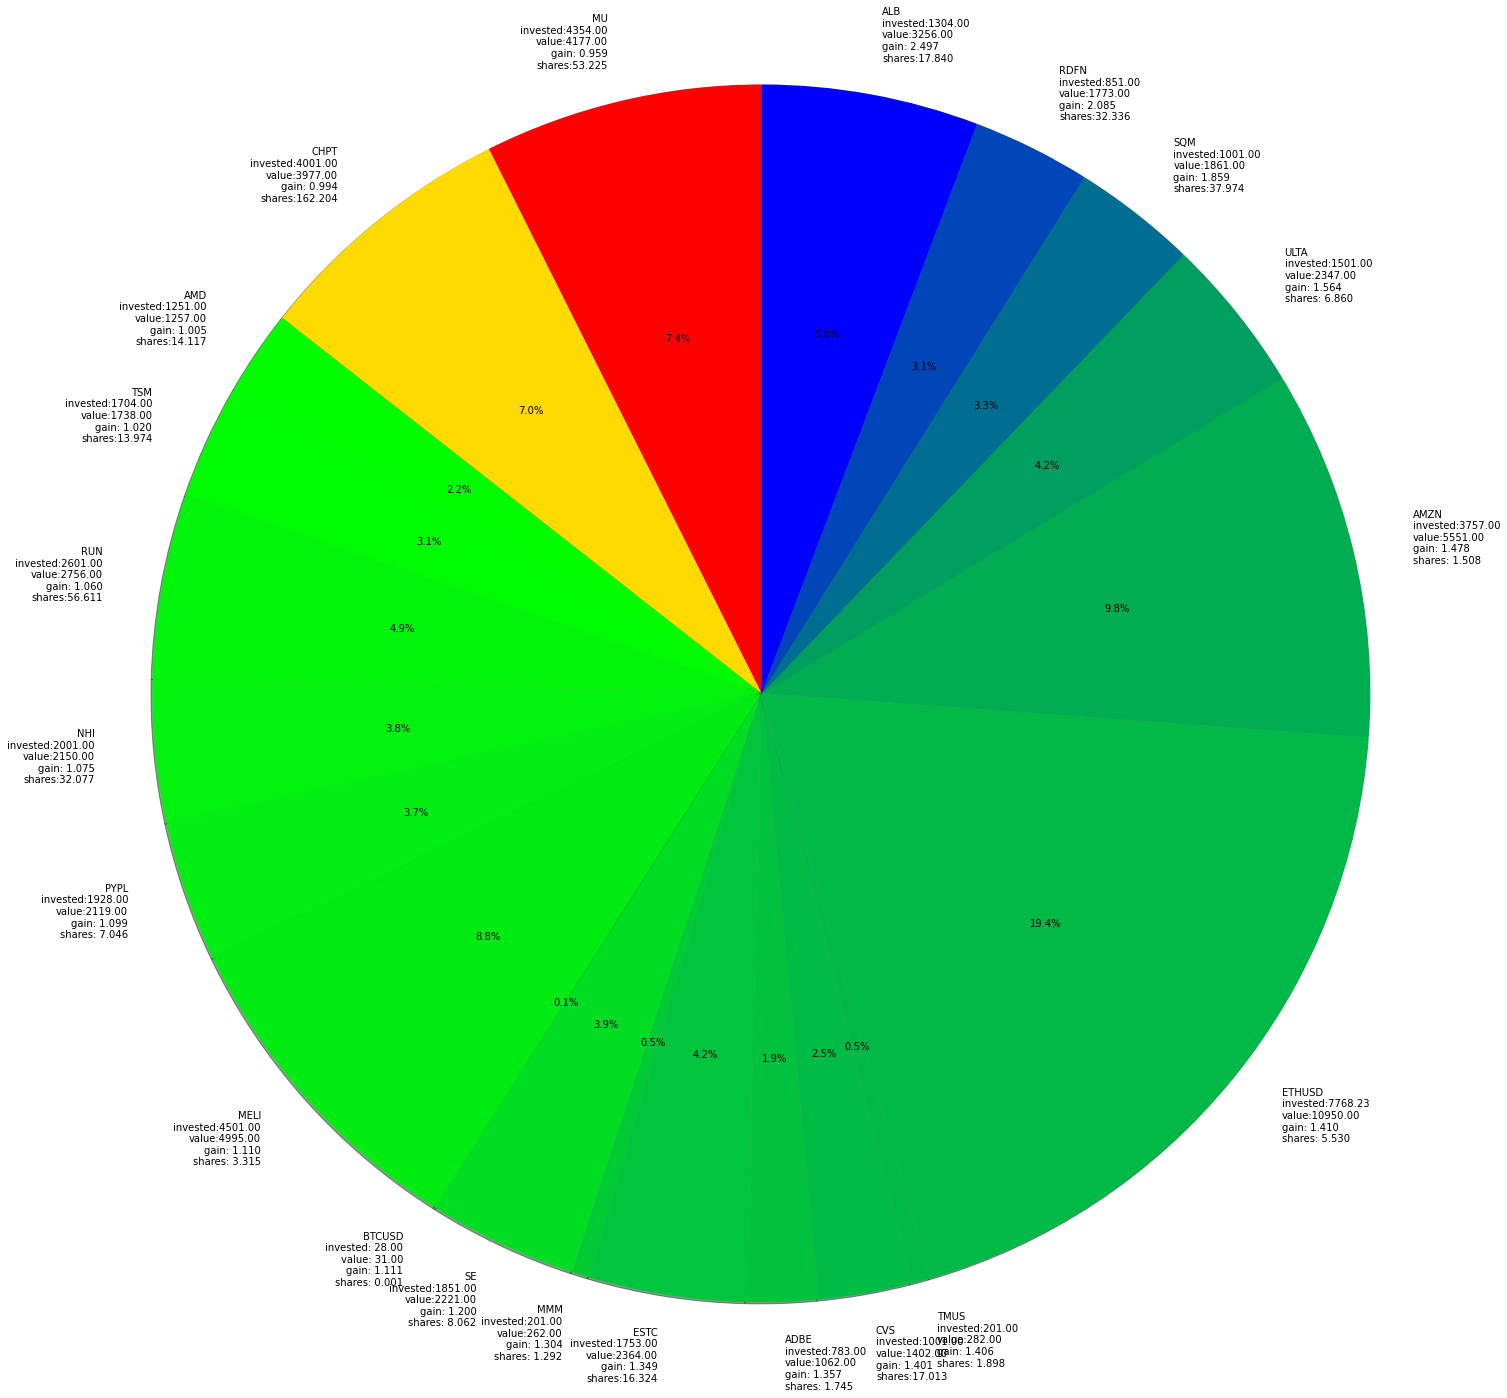



Total Invested:			44341.23
Total Value:			56540.20
Average Gain %:			  1.28
Median Gain:			  1.30


With consideration of reinvestment.
Total Invested (Adjusted):	42770.21
Total Value:			56540.20
Average Gain %:			  1.32
Median Gain:			  1.30


In [9]:
fig1, ax1 = plt.subplots()
todays_df = todays_df.sort_values(by=['gain'])
# rgb_gain(df.gain,0.8,0.95,2)
red_point = min( min(todays_df.gain), 0.95)
blue_point = max( max(todays_df.gain), 3)
green_point = 1

red_point = min(todays_df.gain)
blue_point = max(todays_df.gain)
#green_point = np.median( [1.0] )

print('Red at gain = {}.\nChanges linear to yellow at {}.\nFrom {} to {} is green to blue shift'.\
      format(red_point, green_point, green_point, blue_point))

label_ = list( map( disCap.mklab, todays_df.symbol, \
                   todays_df.invested, todays_df.value, todays_df.gain, todays_df.shares) )
ax1.pie(todays_df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(todays_df.gain,red_point,green_point,blue_point) )

plt.show()

# Sold:  Invested 1700.00
# Sold:  Value 3400.71
# All reinvested.  

print('\n\nTotal Invested:\t\t\t{0:6.2f}\nTotal Value:\t\t\t{1:6.2f}\nAverage Gain %:\t\t\t{2:6.2f}'.\
      format(total_invested, total_value, total_value/total_invested))
print('Median Gain:\t\t\t{0:6.2f}'.format(np.median(todays_df.gain)))

# with consideration of sold & reinvested
# Sold:  Invested 1700.00 + 1400 + 1300 + 251  ( + JMIA + LMND + okta)
# Sold:  Value 3400.71 + 1032.39 + 2167.40 + 310
# # Sold:  Nio, BABA, JD invested (751 + 2554 + 1903) 2,117.59 699.99  1,704.94 
# All reinvested. 

investment_adj = 3400.71 + 1032.39 + 2167.40 + 310 + 2117.59 +699.99 + 1704.94
investment_adj =  investment_adj - 1701.00 - 1401 - 1301 - 251 - 751 - 2554 - 1903
total_investment_adj = total_invested - investment_adj 
print('\n\nWith consideration of reinvestment.')
print('Total Invested (Adjusted):\t{0:6.2f}\nTotal Value:\t\t\t{1:6.2f}\nAverage Gain %:\t\t\t{2:6.2f}'.\
      format(total_investment_adj, total_value, total_value/total_investment_adj))
print('Median Gain:\t\t\t{0:6.2f}'.format(np.median(todays_df.gain)))



In [12]:
fields = ['symbol','gain','basis','close','invested','value','close','prev_close','shares','prc_invested','prc_value','first_investment','last_investment'\
         ,'maxmed30','rho']


todays_df['rho60'] = todays_df['close']/todays_df['maxmed60']
todays_df['rho120'] = todays_df['close']/todays_df['maxmed120']
todays_df = todays_df.sort_values(by=['prc_value'])
todays_df[fields].head(40)

,symbol,gain,basis,close,invested,value,close,prev_close,shares,prc_invested,prc_value,first_investment,last_investment,maxmed30,rho
4,BTCUSD,1.110547,29439.286728,32693.708984,28.00,31.095314,32693.708984,32822.347656,0.000951,0.049522,0.054997,2021.01.02,2021.01.29,35742.771485,0.914694
10,MMM,1.303591,155.593228,202.830000,201.00,262.021879,202.830000,199.600000,1.291830,0.355499,0.463426,2020.07.07,2020.07.07,197.565000,1.026649
18,TMUS,1.406179,105.889790,148.900000,201.00,282.641980,148.900000,147.770000,1.898200,0.355499,0.499896,2020.07.07,2020.07.22,145.670000,1.022173
0,ADBE,1.357007,448.656609,608.830000,783.00,1062.536204,608.830000,605.010000,1.745210,1.384855,1.879258,2020.06.05,2021.01.05,587.220000,1.036801
2,AMD,1.004909,88.614992,89.050000,1251.00,1257.141112,89.050000,90.260000,14.117250,2.212585,2.223447,2021.02.16,2021.03.09,91.415000,0.974129
6,CVS,1.400777,58.838778,82.420000,1001.00,1402.177668,82.420000,81.660000,17.012590,1.770422,2.479966,2020.10.16,2020.10.16,84.125000,0.979733
19,TSM,1.020111,121.937693,124.390000,1704.00,1738.269396,124.390000,123.900000,13.974350,3.013785,3.074396,2021.02.18,2021.03.31,119.260000,1.043015
14,RDFN,2.084567,26.317222,54.860000,851.00,1773.966126,54.860000,57.670000,32.336240,1.505124,3.137531,2020.03.05,2020.03.10,63.865000,0.858999
17,SQM,1.859233,26.360329,49.010000,1001.00,1861.092507,49.010000,50.100000,37.973730,1.770422,3.291627,2020.03.03,2020.03.11,47.345000,1.035167
13,PYPL,1.099141,273.622662,300.750000,1928.00,2119.144650,300.750000,301.190000,7.046200,3.409963,3.748032,2021.02.15,2021.03.05,291.480000,1.031803


In [ ]:
len(todays_df['value'])

In [ ]:
dfx = todays_df

sector_df = dfx[['sector','invested','value']].groupby('sector').agg('sum').reset_index()
total = sum( sector_df['value'] )
sector_df['gain'] = sector_df['value']/sector_df['invested']
sector_df['percentage_value'] = 100.00*sector_df['value']/total

area_df = dfx[['area','invested','value']].groupby('area').agg('sum').reset_index()
total = sum( area_df['value'] )
area_df['gain'] = area_df['value']/area_df['invested']
area_df['percentage_value'] = 100*area_df['value']/total

In [ ]:
fig1, ax1 = plt.subplots()
df = sector_df
df = df.sort_values(by=['gain'])

label_ = list( map( disCap.mklab, df.sector, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
fig1, ax1 = plt.subplots()
df = area_df
df = df.sort_values(by=['gain'])

red_point = min(df.gain)
blue_point = max(df.gain)
green_point = np.median( df.gain )
green_point = 1.0

label_ = list( map( disCap.mklab, df.area, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
todays_df = todays_df.sort_values(by=['last_investment'])
todays_df[fields].head(40)